In [1]:
import sys
from os import path, chdir
from collections import defaultdict
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt


sys.path.append('..')

from utils.meta_util import load_meta_infos, collect_by
from utils.tensor_holders import TensorHolder
from utils.plot_util import plot, legend

chdir('..')

Load results

In [2]:
results = load_meta_infos(path.join('results', 'vae', 'mnist'))
pprint(results)

[{'batch_size': 128,
  'compute_perf': True,
  'compute_variance': True,
  'dataset': 'MNIST',
  'device': 'cuda',
  'distribution': 'MultivariateNormal',
  'epochs': 10,
  'hidden_dims': [400],
  'latent_dim': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'MVD',
  'path': 'results/vae/mnist\\MVD\\1\\11894567',
  'plot_label': '$mc_estimator$ $sample_size$ sample(s)',
  'revision': 'b8c14160d8c8e0cafde77020dbf81309700ab79a',
  'sample_size': 1,
  'saved_metrics': ['train_loss',
                    'test_loss',
                    'estimator_times',
                    'estimators_stds'],
  'seed': 11894567,
  'subpath_keys': ['mc_estimator', 'sample_size'],
  'task': 'vae',
  'vae_type': 'fc'},
 {'batch_size': 128,
  'compute_perf': True,
  'compute_variance': True,
  'dataset': 'MNIST',
  'device': 'cuda',
  'distribution': 'MultivariateNormal',
  'epochs': 10,
  'hidden_dims': [400],
  'latent_dim': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'MVD',
  'path': 'results/vae/mnist

In [11]:
test_losses = defaultdict(list)
for k, v in collect_by(results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder(meta['path'], 'test_loss')))
test_losses.default_factory = None

for v in test_losses.values():
    pprint(v[0][1].numpy())

array([133.7139  , 119.12023 , 113.93824 , 111.49676 , 109.87576 ,
       109.00655 , 108.015884, 108.17189 , 107.40061 , 107.62476 ],
      dtype=float32)
array([126.62528 , 115.293365, 111.05401 , 109.3062  , 107.9555  ,
       106.900894, 106.31626 , 105.73884 , 105.45127 , 105.10796 ],
      dtype=float32)
array([123.892815, 113.30213 , 109.82245 , 108.16415 , 106.87648 ,
       105.99356 , 105.6697  , 104.85503 , 104.78065 , 104.22497 ],
      dtype=float32)
array([149.58197 , 136.22319 , 128.26723 , 122.65404 , 119.97778 ,
       119.158104, 117.09145 , 116.84608 , 115.12468 , 114.70478 ],
      dtype=float32)
array([135.80849 , 121.18055 , 115.34432 , 112.62645 , 111.14214 ,
       109.47363 , 109.02713 , 108.075874, 107.84351 , 107.15834 ],
      dtype=float32)


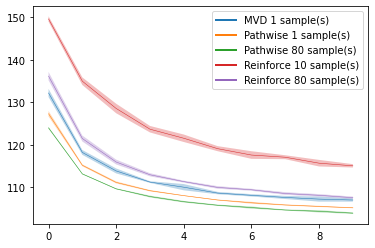

In [15]:
plot_dir = 'notebooks'

for run in test_losses.values():
    meta, _ = run[0]
    meta['seed'] = None  # Remove seed because it is irrelevant now
    losses = []
    for meta, loss in run:
        losses.append(loss.numpy())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), meta)

legend()
plt.savefig(path.join(plot_dir, 'test_losses'))
plt.show()